# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


## Helpful resource
https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905

In [45]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function, division
import pandas as pd

In [46]:
df_url = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')

In [47]:
df_url.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [125]:
df = df_url[["sqft_living", "bedrooms", "price"]]

In [126]:
df.head()

,sqft_living,bedrooms,price
0,1180,3,221900.0
1,2570,3,538000.0
2,770,2,180000.0
3,1960,4,604000.0
4,1680,3,510000.0


In [127]:
df.isna().sum()

sqft_living    0
bedrooms       0
price          0
dtype: int64

In [128]:
df.shape

(21613, 3)

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Slit into test and train datasets
y = df.loc[:, ['price']].values
X = df.loc[:, ['sqft_living','bedrooms']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("\ncoefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)


RMSE is 0.7402534993559042
R^2 is 0.504153747526068

coefficients:  [ 0.76234166 -0.15613847]
intercepts:  [-0.00775159]


In [56]:
#let's normalize the data and don to split it into train/test
X = df[["sqft_living", "sqft_lot"]].values
y = df['price'].values

#lets standarize the X matrix
X = (X - X.mean()) / X.std()

X_linalg = np.c_[np.ones(X.shape[0]), X]

#print(X_linalg)

#Model fitting
model = LinearRegression()
model.fit(X,y)

#our coefficients 
beta1 = model.coef_[0]
beta0 = model.intercept_

print("beta_1: ", beta1)
print("beta_0: ", beta0)

beta_1:  8489366.81784666
beta_0:  2384512.8434987683


### lets Normalize our data first:


In [129]:
df = (df - df.mean())/df.std()

In [130]:
df.head() #we see that the data does indeed look standarized

,sqft_living,bedrooms,price
0,-0.979812,-0.398728,-0.866697
1,0.533622,-0.398728,-0.005688
2,-1.426221,-1.473925,-0.980827
3,-0.130547,0.676469,0.174086
4,-0.435412,-0.398728,-0.081956


### Creating Matrices and setting the parameters

In [131]:
X = df.iloc[:, 0:2]
ones = np.ones([X.shape[0],1]) #create a vector of ones

In [108]:
ones.shape

(21613, 1)

In [109]:
X.shape

(21613, 2)

In [110]:
print(X)

       sqft_living  sqft_lot
0        -0.979812 -0.228316
1         0.533622 -0.189881
2        -1.426221 -0.123296
3        -0.130547 -0.244009
4        -0.435412 -0.169649
5         3.636707  2.096136
6        -0.397303 -0.200093
7        -1.110469 -0.130273
8        -0.326531 -0.184376
9        -0.206763 -0.206346
10        1.611536 -0.128221
11       -1.001588 -0.219866
12       -0.707612  0.115741
13       -0.772940 -0.131021
14       -0.293867 -0.247630
15        0.947367 -0.244009
16       -0.206763 -0.025759
17       -0.522516 -0.260909
18       -0.958036 -0.126917
19       -0.903596 -0.128752
20       -0.500740 -0.244492
21        1.056247  0.718485
22        0.206981 -0.212623
23       -1.099581 -0.131915
24        0.402966 -0.207795
25       -0.402747 -0.251324
26        0.402966 -0.299754
27       -0.740276 -0.326552
28       -0.609620 -0.210692
29        0.533622 -0.191547
...            ...       ...
21583    -1.491549 -0.336789
21584    -0.892708 -0.342994
21585    -0.22

In [132]:
#lets concatenate ones and our X matrix
X = np.concatenate((ones, X), axis=1)

In [133]:
X.shape

(21613, 3)

In [134]:
#Lets get our y dependent variable 
y = df.iloc[:, 2:3].values

In [135]:
print(y)

[[-0.86669728]
 [-0.00568779]
 [-0.98082666]
 ...
 [-0.3758565 ]
 [-0.38157931]
 [-0.58586818]]


In [136]:
theta = np.zeros([1,3])
print(theta)

[[0. 0. 0.]]


In [151]:
#lets set hyper parameters
alpha = 0.01
iters = 1000

### The above codes can we written in one simple code block

In [100]:
#setting the matrixes
X = df.iloc[:,0:2] #we want last two columns to be in our X matrix
ones = np.ones([X.shape[0],1]) #add a vector of ones
X = np.concatenate((ones,X),axis=1) #add ones to our X matrix

y = df.iloc[:,0].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,3])

#set hyper parameters
alpha = 0.01
iters = 1000

### Creation of the Cost Function

In [152]:
def CostFunction(X, y, theta):
    to_be_summed = np.power(((X @ theta.T)-y), 2)
    return np.sum(to_be_summed) / (2 * len(X))
    

In [139]:
CostFunction(X, y, theta)

0.49997686577522815

In [153]:
def GradientDescent(X, y, theta, iters, alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta -(alpha/len(X)) * np.sum(X * (X @ theta.T-y), axis =0)
        cost[i] = CostFunction(X, y, theta)
        
    return theta, cost
    

In [154]:
g, cost = GradientDescent(X, y, theta, iters, alpha)
print("g: ", g)

finalCost = CostFunction(X,y, g)
print("\n", finalCost)

g:  [[-1.77112960e-16  7.78718940e-01 -1.37884725e-01]]

 0.24660586784956914


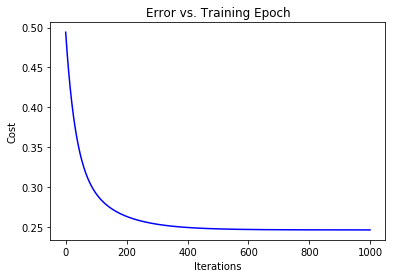

In [155]:
fig, ax = plt.subplots()
ax.plot(np.arange(iters), cost, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title("Error vs. Training Epoch")

## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)